# keras

## 線形回帰

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Generation: 10. 誤差 = 2.9977393
Generation: 20. 誤差 = 2.0468807
Generation: 30. 誤差 = 1.4064118
Generation: 40. 誤差 = 0.9738777
Generation: 50. 誤差 = 0.6807888
Generation: 60. 誤差 = 0.48134094
Generation: 70. 誤差 = 0.34488678
Generation: 80. 誤差 = 0.25090468
Generation: 90. 誤差 = 0.18564178
Generation: 100. 誤差 = 0.13987058
Generation: 110. 誤差 = 0.10739045
Generation: 120. 誤差 = 0.08402662
Generation: 130. 誤差 = 0.06696122
Generation: 140. 誤差 = 0.054286137
Generation: 150. 誤差 = 0.044704143
Generation: 160. 誤差 = 0.0

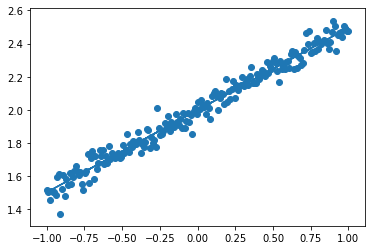

In [1]:
import numpy as np
import matplotlib.pyplot as plt

iters_num = 1000
plot_interval = 10

x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1))

# モデルを表示
model.summary()

# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')

# train
for i in range(iters_num):
    loss = model.train_on_batch(x, d)
    if (i+1) % plot_interval == 0:
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W:', W)
print('b:', b)

y = model.predict(x)
plt.scatter(x, d)
plt.plot(x, y)
plt.show()

## 単純パーセプトロン 
OR回路

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  np.random.seed(0)をnp.random.seed(1)に変更
-  エポック数を100に変更
-  AND回路, XOR回路に変更
-  OR回路にしてバッチサイズを10に変更
-  エポック数を300に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
#np.random.seed(0)
np.random.seed(1)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
#model.add(Dense(input_dim=2, units=5, activation='relu'))
#model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T：　OR回路
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )

# トレーニング用入力 X と正解データ T：　AND回路
#X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
#T = np.array( [[0], [0], [0], [1]] )

# トレーニング用入力 X と正解データ T：　XOR回路
#X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
#T = np.array( [[0], [1], [1], [0]] )

# トレーニング
model.fit(X, T, epochs=100, batch_size=1)
#model.fit(X, T, epochs=300, batch_size=10)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 0s 35ms/step - loss: 0.4976
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4734
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4528
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4364
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4231
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4115
Epoch 7/100
4/4 [==============================] - 0s

In [ ]:
np.random.seed(1)

# OR回路
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )

model.fit(X, T, epochs=30, batch_size=1)    # OR回路（エポック=30）==> ×
Epoch 30/30
4/4 [==============================] - 0s 3ms/step - loss: 0.2961
TEST
[[False]
 [ True]
 [ True]
 [ True]]

model.fit(X, T, epochs=100, batch_size=1)    # OR回路（エポック=100）==> 〇
Epoch 100/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1715
TEST
[[ True]
 [ True]
 [ True]
 [ True]]

# AND回路　==> 〇
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [0], [0], [1]] )

Epoch 100/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2527
TEST
[[ True]
 [ True]
 [ True]
 [ True]]

# XOR回路　==> ×
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [0]] )

Epoch 100/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7196
TEST
[[ True]
 [False]
 [ True]
 [False]]


# OR回路
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )

model.fit(X, T, epochs=100, batch_size=10)  # OR回路（エポック=100、バッチサイズ=10）==> ×
Epoch 100/100
4/4 [==============================] - 0s 750us/step - loss: 0.3063
TEST
[[False]
 [ True]
 [ True]
 [ True]]

model.fit(X, T, epochs=300, batch_size=10)  # OR回路（エポック=300、バッチサイズ=10）==> 〇
Epoch 300/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2007
TEST
[[ True]
 [ True]
 [ True]
 [ True]]

## 分類 (iris)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  中間層の活性関数をsigmoidに変更しよう
-  SGDをimportしoptimizerをSGD(lr=0.1)に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                60        
_________________________________________________________________
activation_5 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_6 (Activation)    (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 1ms/step - loss: 1.0044 - accuracy: 0.5083 - val_loss: 1.0206 - val_accuracy: 0.3333
Epoch 2/20
120/120 [==============================] - 0s 300us/step -

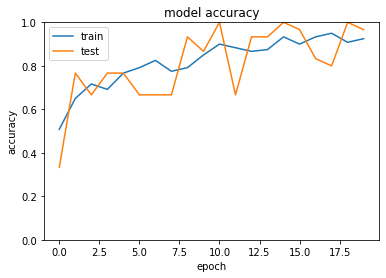

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
# model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=SGD(lr=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


In [ ]:
model.add(Activation('relu'))
Epoch 20/20
120/120 [==============================] - 0s 367us/step - loss: 0.3203 - accuracy: 0.9083 - val_loss: 0.2671 - val_accuracy: 0.9667

model.add(Activation('sigmoid'))
120/120 [==============================] - 0s 275us/step - loss: 0.7158 - accuracy: 0.8333 - val_loss: 0.7737 - val_accuracy: 0.9333

## 分類 (mnist)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  load_mnistのone_hot_labelをFalseに変更しよう (error)
-  誤差関数をsparse_categorical_crossentropyに変更しよう
-  Adamの引数の値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 3

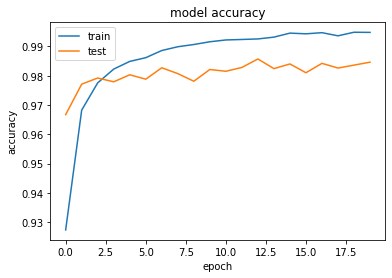

In [16]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

#(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784, )))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='sparse_categorical_crossentropy', 
              # optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

In [ ]:
base:
Epoch 20/20
60000/60000 [==============================] - 20s 333us/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0731 - val_accuracy: 0.9845
Test loss: 0.07312285845366405
Test accuracy: 0.984499990940094

category classify:
Epoch 20/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0749 - val_accuracy: 0.9848
Test loss: 0.07494800291256251
Test accuracy: 0.9847999811172485

Adam(lr=0.001, beta_1=0.7, beta_2=0.999):


## CNN分類 (mnist)
#### 実行に時間がかかるため割愛

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)             

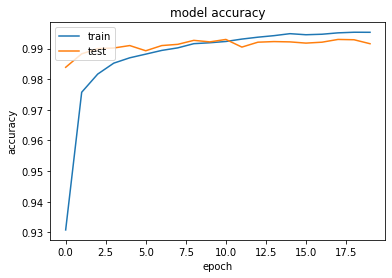

In [17]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# 行列として入力するための加工
batch_size = 128
num_classes = 10
epochs = 20

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

## cifar10
#### 実行に時間がかかるため割愛
データセット cifar10<br>
32x32ピクセルのカラー画像データ<br>
10種のラベル「飛行機、自動車、鳥、猫、鹿、犬、蛙、馬、船、トラック」<br>
トレーニングデータ数:50000, テストデータ数:10000<br>
http://www.cs.toronto.edu/~kriz/cifar.html

In [10]:
#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()

#CIFAR-10の正規化
from keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルの1-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#訓練
history = model.fit(x_train, d_train, epochs=20)
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))

Epoch 1/20
50000/50000 [==============================] - 525s 11ms/step - loss: 1.5390 - accuracy: 0.4384
Epoch 2/20
50000/50000 [==============================] - 475s 9ms/step - loss: 1.1467 - accuracy: 0.5917
Epoch 3/20
50000/50000 [==============================] - 459s 9ms/step - loss: 0.9816 - accuracy: 0.6574
Epoch 4/20
50000/50000 [==============================] - 434s 9ms/step - loss: 0.8849 - accuracy: 0.6903
Epoch 5/20
50000/50000 [==============================] - 432s 9ms/step - loss: 0.8166 - accuracy: 0.7130
Epoch 6/20
50000/50000 [==============================] - 431s 9ms/step - loss: 0.7691 - accuracy: 0.7293
Epoch 7/20
50000/50000 [==============================] - 478s 10ms/step - loss: 0.7246 - accuracy: 0.7469
Epoch 8/20
50000/50000 [==============================] - 505s 10ms/step - loss: 0.6977 - accuracy: 0.7537
Epoch 9/20
50000/50000 [==============================] - 513s 10ms/step - loss: 0.6614 - accuracy: 0.7666
Epoch 10/20
50000/50000 [=================

## RNN

2進数足し算の予測

Keras RNNのドキュメント
https://keras.io/ja/layers/recurrent/#simplernn

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  RNNの出力ノード数を128に変更
-  RNNの出力活性化関数を sigmoid に変更
-  RNNの出力活性化関数を tanh に変更
-  最適化方法をadamに変更
-  RNNの入力 Dropout を0.5に設定
-  RNNの再帰 Dropout を0.3に設定
-  RNNのunrollをTrueに設定

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [18]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='sigmoid',
               #dropout=0.5,
               recurrent_dropout=0.3,
               unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
# model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_48 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 11s 1ms/step - loss: 0.2491 - accuracy: 0.5249
Epoch 2/5
10000/10000 [==============================] - 12s 1ms/step - loss: 0.2357 - accuracy: 0.6133
Epoch 3/5
10000/10000 [==============================] - 16s 2ms/step - loss: 0.1885 - accuracy: 0.7321
Epoch 4/5
10000/10000 [==============================] - 19s 2ms/step - loss: 0.1442 - accuracy: 0.8129
Epoch 5/5
10000/10000 [==============================] - 15s 2ms/step - loss: 0.1023 - accuracy: 0.85

In [ ]:
base:
Epoch 5/5
10000/10000 [==============================] - 34s 3ms/step - loss: 3.2093e-04 - accuracy: 1.0000
Test loss: 0.00027501513369800843
Test accuracy: 1.0

出力ノード数128:
Epoch 5/5
10000/10000 [==============================] - 33s 3ms/step - loss: 2.6804e-04 - accuracy: 1.0000
Test loss: 0.00023022890684079554
Test accuracy: 1.0

sigmoid:
Epoch 5/5
10000/10000 [==============================] - 34s 3ms/step - loss: 0.1780 - accuracy: 0.7588
Test loss: 0.11756535312353653
Test accuracy: 0.8681368231773376

tanh:
Epoch 5/5
10000/10000 [==============================] - 32s 3ms/step - loss: 2.1175e-04 - accuracy: 1.0000
Test loss: 0.00018430571535910556
Test accuracy: 1.0

Adam(sigmoid):
Epoch 1/5
10000/10000 [==============================] - 37s 4ms/step - loss: 0.2483 - accuracy: 0.5378
Epoch 2/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.2351 - accuracy: 0.6500
Epoch 3/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.1304 - accuracy: 0.8938
Epoch 4/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 5/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Test loss: 0.0003068407746577224
Test accuracy: 1.0

入力Dropout=0.5：
Epoch 5/5
10000/10000 [==============================] - 58s 6ms/step - loss: 0.2346 - accuracy: 0.5985
Test loss: 0.219319970384337
Test accuracy: 0.6883438229560852

再帰Dropout=0.3：
Epoch 1/5
10000/10000 [==============================] - 73s 7ms/step - loss: 0.2498 - accuracy: 0.5178
Epoch 2/5
10000/10000 [==============================] - 72s 7ms/step - loss: 0.2424 - accuracy: 0.5883
Epoch 3/5
10000/10000 [==============================] - 73s 7ms/step - loss: 0.2042 - accuracy: 0.7074
Epoch 4/5
10000/10000 [==============================] - 72s 7ms/step - loss: 0.1616 - accuracy: 0.7955
Epoch 5/5
10000/10000 [==============================] - 74s 7ms/step - loss: 0.1291 - accuracy: 0.8358
Test loss: 0.091214589664329
Test accuracy: 0.9148289561271667

Unroll=True（再帰Dropout=0.3）：
Epoch 1/5
10000/10000 [==============================] - 25s 3ms/step - loss: 0.2499 - accuracy: 0.5166
Epoch 2/5
10000/10000 [==============================] - 25s 3ms/step - loss: 0.2406 - accuracy: 0.6024
Epoch 3/5
10000/10000 [==============================] - 25s 2ms/step - loss: 0.1929 - accuracy: 0.7179
Epoch 4/5
10000/10000 [==============================] - 25s 2ms/step - loss: 0.1302 - accuracy: 0.8324
Epoch 5/5
10000/10000 [==============================] - 25s 2ms/step - loss: 0.0821 - accuracy: 0.9091
Test loss: 0.0420767759734934
Test accuracy: 0.9562081098556519
